# LSTM for Predicting Daily Return and Log Return (In-Sample Testing Only)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset
df = pd.read_csv("dataFiles/IBM.csv", index_col="Date", parse_dates=True)
df = df.tail(7000)
close_prices = df['Close'].values.reshape(-1, 1)

# Normalize prices using Min-Max Scaling
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

# Function to create lookback sequences
def create_dataset(data, look_back=5):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i])
        y.append(data[i])
    return np.array(X), np.array(y)

look_back = 5
X, y = create_dataset(scaled_prices, look_back)

# Train-Test split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform to original scale
train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)




Epoch 1/100


/Users/ankuryadav/Downloads/data-iitm/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0098
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7228e-04
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9713e-04
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2678e-04
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2614e-04
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9156e-04
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7006e-04
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4250e-04
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4564e-04
Epoch 10/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2749e-04
Epoch 11/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9406e-04
Epoch 12/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8470e-04
Epoch 13/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0275e-04
Epoch 14/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8306e-04
Epo

--- Train ---
RMSE: 1.2835427155361143
MAE : 0.9299533839222348
R^2 : 0.9980067401476868

--- Test ---
RMSE: 4.149637068933799
MAE : 2.6801685390513295
R^2 : 0.9914380793676862



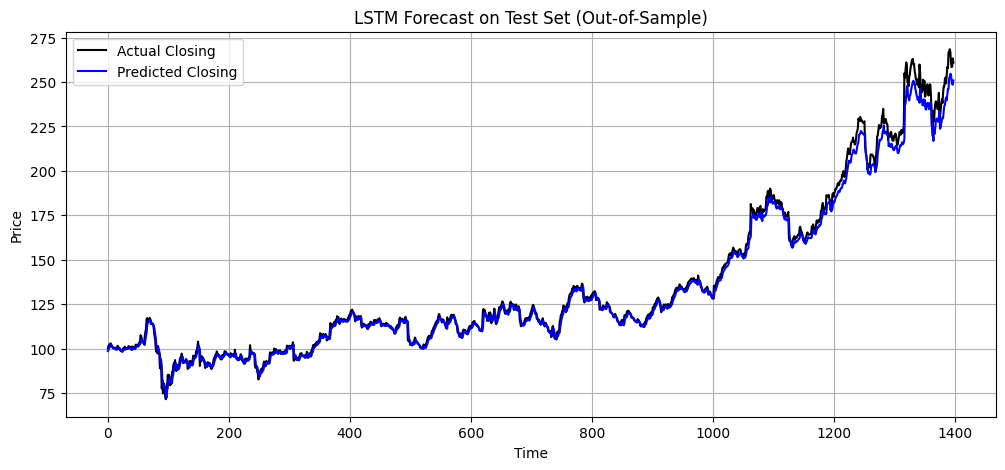

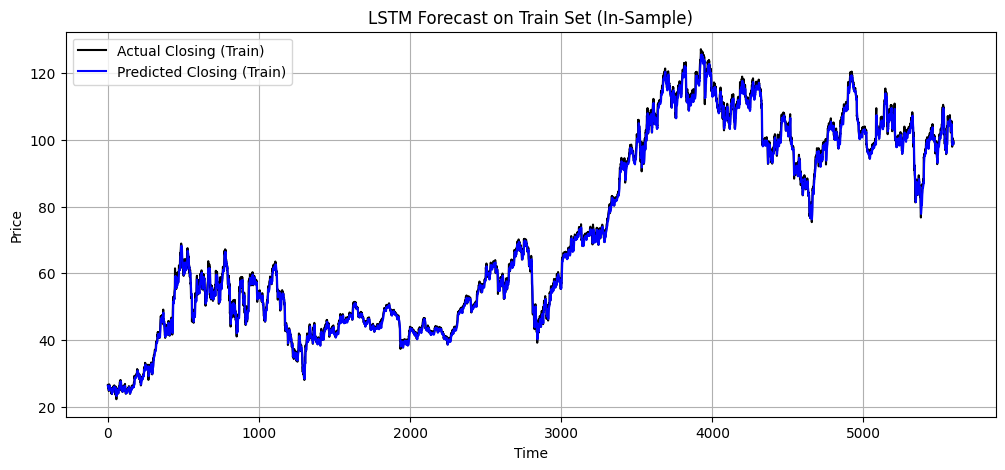

In [27]:
# Metrics
def evaluate(true, pred, name="Set"):
    print(f"--- {name} ---")
    print("RMSE:", np.sqrt(mean_squared_error(true, pred)))
    print("MAE :", mean_absolute_error(true, pred))
    print("R^2 :", r2_score(true, pred))
    print()

evaluate(y_train_inv, train_pred_inv, "Train")
evaluate(y_test_inv, test_pred_inv, "Test")

# Plot results
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual Closing", color='black')
plt.plot(test_pred_inv, label="Predicted Closing",color='blue')
plt.title("LSTM Forecast on Test Set (Out-of-Sample)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(y_train_inv, label="Actual Closing (Train)", color='black')
plt.plot(train_pred_inv, label="Predicted Closing (Train)",color='blue')
plt.title("LSTM Forecast on Train Set (In-Sample)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()